### Исследование данных авиакомпании — проверить гипотезу о повышении спроса во время фестивалей.

## План проекта
1.[Открыть файл с данными](#cell1)

2.[Предобработка данных](#cell2)

3.[Исследовательский анализ данных](#cell3)

4.[Общий вывод](#cell4)

### Открыть файлы с данными.
<a id='cell1'></a>

1. Импортировал библиотеки pandas, matplolib, numpy, stats.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

2. Сохранил файлы в переменных query_1 и query_3.

In [2]:
query_1 = pd.read_csv('/datasets/query_1.csv')
query_3 = pd.read_csv('/datasets/query_3.csv')

3.Ознакомился со сводной информацией в таблицах, вызвав метод info(), head(), describe().

In [3]:
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [5]:
query_1.head()

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


In [6]:
query_3.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [7]:
pd.set_option('display.float_format', '{:,.2f}'.format)
query_1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
model,8,8,Cessna 208 Caravan,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flights_amount,8.00,NaN,NaN,NaN,"2,035.62","1,965.20",300.00,605.25,795.00,"4,250.25","4,557.00"


In [8]:
pd.set_option('display.float_format', '{:,.2f}'.format)
query_3.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
city,101,101,Красноярск,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
average_flights,101.00,NaN,NaN,NaN,5.49,13.12,1.00,2.00,3.00,5.87,129.77


### Предобработка данных.
<a id='cell2'></a>

1.Предобработка датафреймам query_1 и query_3 не требуется, типы данных не требуют изменений, а пустые значения и дубликаты отсутсвуют.

In [9]:
query_1.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
dtype: bool

In [10]:
query_3.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
96     False
97     False
98     False
99     False
100    False
Length: 101, dtype: bool

In [11]:
query_1.isnull().sum()

model             0
flights_amount    0
dtype: int64

In [12]:
query_3.isnull().sum()

city               0
average_flights    0
dtype: int64

In [13]:
query_3.head()

,city,average_flights
0,Абакан,3.87
1,Анадырь,1.00
2,Анапа,2.16
3,Архангельск,5.35
4,Астрахань,2.45


### Исследовательский анализ данных.
<a id='cell3'></a>

1. Выбор топ-10 городов по количеству рейсов.

In [14]:
top_10_towns = query_3.sort_values(by=['average_flights'], ascending=False)
display(top_10_towns.head(10))

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32
67,Ростов-на-Дону,10.19
63,Пермь,10.13
10,Брянск,10.00
74,Сочи,9.61
84,Ульяновск,9.58


2. Построение графиков (модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов).

In [15]:
query_1 = query_1.sort_values(by='flights_amount', ascending=False)

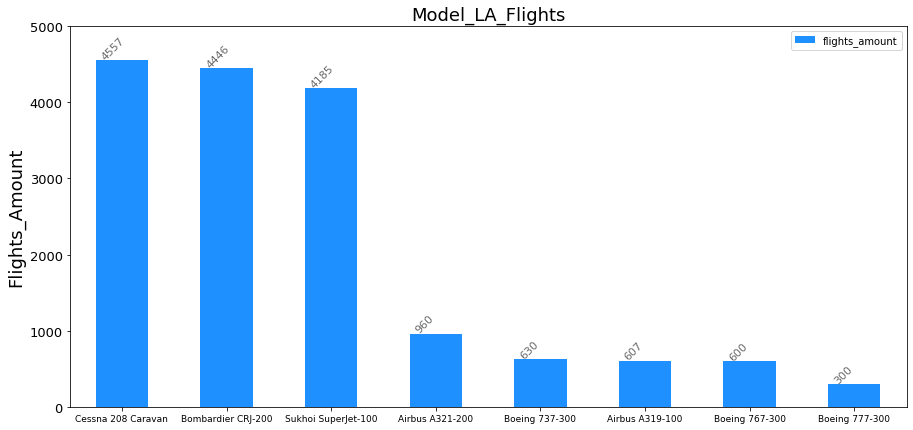

In [17]:
ax = query_1[['model', 'flights_amount']].plot(kind='bar',
              figsize=(15,7), color=['dodgerblue', 'slategray'], fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Model_LA_Flights",
fontsize=18)
ax.set_ylabel("Flights_Amount", fontsize=18);
ax.set_yticks([0, 1000, 2000, 3000, 4000, 5000])
ax.set_xticklabels(['Cessna 208 Caravan', 'Bombardier CRJ-200', 
                    'Sukhoi SuperJet-100', 'Airbus A321-200', 
                    'Boeing 737-300', 'Airbus A319-100', 'Boeing 767-300', 'Boeing 777-300'], rotation=0, fontsize=9)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.04, i.get_height()+10, \
            str(round((i.get_height()), 2)), fontsize=11, color='dimgrey',
                rotation=45)

In [18]:
top_10_towns = top_10_towns.query('city in("Москва", "Санкт-Петербург", "Новосибирск", "Красноярск", "Екатеринбург", "Ростов-на-Дону", "Сочи", "Ульяновск", "Пермь", "Брянск")')

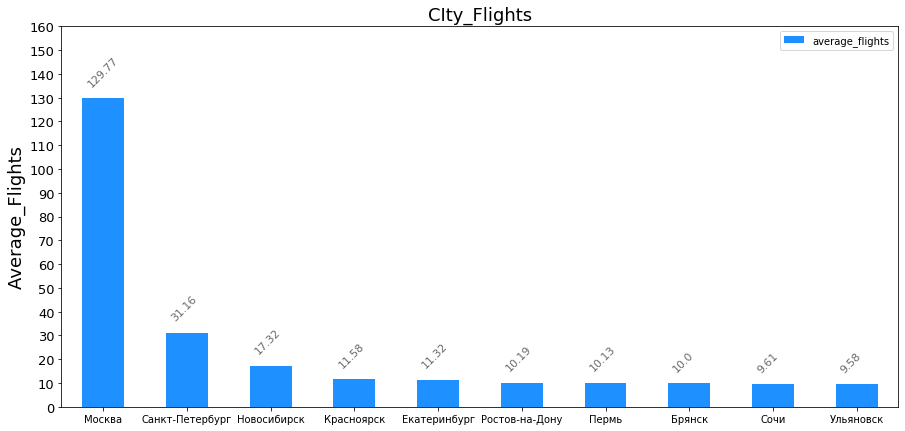

In [20]:
ax1 = top_10_towns[['city', 'average_flights']].plot(kind='bar',
              figsize=(15,7), color=['dodgerblue', 'slategray'], fontsize=13);
ax1.set_alpha(0.8)
ax1.set_title("CIty_Flights",
fontsize=18)
ax1.set_ylabel("Average_Flights", fontsize=18);
ax1.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160])
ax1.set_xticklabels(['Москва', 'Санкт-Петербург', 
                    'Новосибирск', 'Красноярск', 
                    'Екатеринбург', 'Ростов-на-Дону', 'Пермь', 'Брянск', 'Сочи', 'Ульяновск'], rotation=0, fontsize=10)

# set individual bar lables using above list
for i in ax1.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax1.text(i.get_x()+.04, i.get_height()+5, \
            str(round((i.get_height()), 2)), fontsize=11, color='dimgrey',
                rotation=45)

### Общий вывод.
<a id='cell4'></a>

ТОП 3 города с самым большим средним количеством рейсов, прибывающих в город за день в августе 2018 года - это Москва, Санкт-Петербург и Новосибирск. Результаты очевидны т.к это топ три самых населенных города России. Москва столица России, Санкт-Петербург можно условно считать второй столицей, а Новосибирск столица Западной Сибири,явно приоритетные направления для перелетов.

ТОП 3 самолетов с самым большим количеством рейсов в сентябре 2018 года - это Cessna 208 Caravan, Sukhoi SuperJet-100, Bombardier CRJ-200. 
* Большую часть парка компании Аэрофлот составляет Sukhoi SuperJet-100(вместимость до 108 пассажиров), а Аэфрофлот является крупнейшей авиакомпанией России, осюда и частота полетов.
* Bombardier CRJ-200(вместимость 40-50 пассажиров), этот лайнер может выполнять рейсы в сложных метеоусловиях, что немаловажно в суровых зимних условиях России, видимо этот факт очень повышает его эксплуатацию.
*  Cessna 208 Caravan. Cамолеты вместимостью до 10 пасс. очень востребованы для обслуживания местных линий в России, поскольку стоимость перевозок на Ан-2, традиционно эксплуатировавшихся на этих маршрутах, возросла из-за высокой стоимости авиационного бензина. Турбовинтовой самолет Cessna заправляется обычным авиационным керосином.